In [102]:
import numpy as np
import pandas as pd 
import pickle
from pathlib import Path
import polars as pl
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import average_precision_score

In [103]:
dtypes = {'buildingblock1_smiles': np.int16, 'buildingblock2_smiles': np.int16, 'buildingblock3_smiles': np.int16,
          'binds_BRD4':np.byte, 'binds_HSA':np.byte, 'binds_sEH':np.byte}

directory = Path("../../data/shrunken/")

In [104]:
train_data =  pl.read_parquet(directory / "train.parquet")
train_data = train_data.to_pandas(use_pyarrow_extension_array=True)

In [105]:
train_dicts1 = pickle.load(open(directory / "train_dicts/BBs_dict_reverse_1.p", "rb"))
train_dicts2 = pickle.load(open(directory / "train_dicts/BBs_dict_reverse_2.p", "rb"))
train_dicts3 = pickle.load(open(directory / "train_dicts/BBs_dict_reverse_3.p", "rb"))

In [106]:
test_data =  pl.read_parquet(directory / "test.parquet")
test_data = test_data.to_pandas(use_pyarrow_extension_array=True)

In [107]:
test_dicts1 = pickle.load(open(directory / "test_dicts/BBs_dict_reverse_1_test.p", "rb"))
test_dicts2 = pickle.load(open(directory / "test_dicts/BBs_dict_reverse_2_test.p", "rb"))
test_dicts3 = pickle.load(open(directory / "test_dicts/BBs_dict_reverse_3_test.p", "rb"))

In [108]:
# Swap keys and values in the dictionaries
train_dicts1 = {v: k for k, v in train_dicts1.items()}
train_dicts2 = {v: k for k, v in train_dicts2.items()}
train_dicts3 = {v: k for k, v in train_dicts3.items()}

Text(0.5, 1.0, 'Distribution of buildingblock1_smiles where binds_sEH is 1')

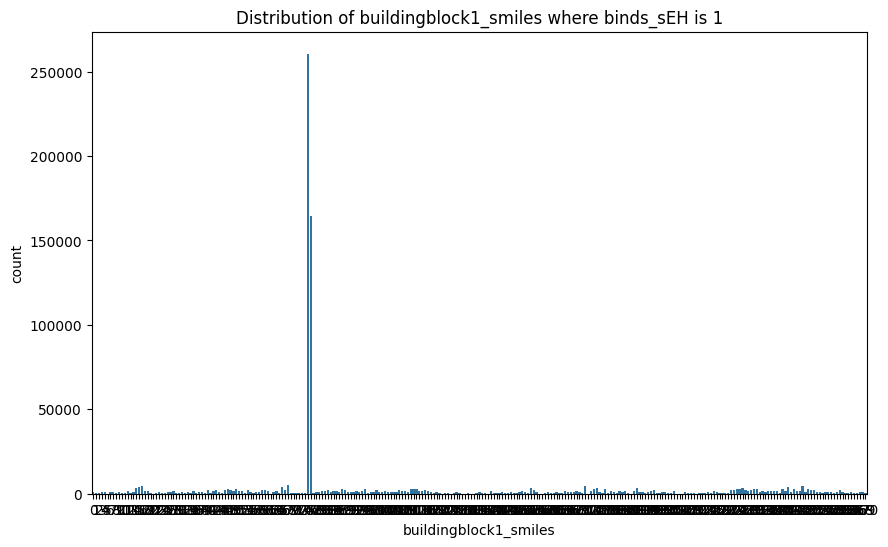

In [109]:
# Plot distribution of binding classes and building block smiles


# Print counts of buildingblock1_smiles where binds_sEH is 1
# plot_data = train_data
BUILDINGBLOCK = 'buildingblock1_smiles'
# print(plot_data[plot_data['binds_sEH'] == 1][BUILDINGBLOCK].value_counts())
# Count buildingblock1_smiles value counts
# print(train_data[train_data['binds_sEH'] == 1][BUILDINGBLOCK].value_counts())

# Plot distribution of buildingblock1_smiles where binds_sEH is 1
plt.figure(figsize=(10, 6))
sns.countplot(x=BUILDINGBLOCK, data=train_data[train_data['binds_sEH'] == 1])
plt.title(f'Distribution of {BUILDINGBLOCK} where binds_sEH is 1')

In [110]:
train_data.value_counts(BUILDINGBLOCK)

buildingblock1_smiles
120    363469
266    363460
101    363456
81     363454
215    363443
        ...  
218    362487
76     362476
75     362464
96     362458
73     362325
Name: count, Length: 271, dtype: int64

In [111]:
binds_seh_bb1 = train_data[train_data['binds_sEH'] == 1].value_counts('buildingblock1_smiles')
total_seh_bb1 = train_data.value_counts('buildingblock1_smiles')
# Calculate percentage of buildingblock1_smiles where binds_sEH is 1
percentage_seh_bb1 = binds_seh_bb1 / total_seh_bb1 * 100

# Sort by percentage
percentage_seh_bb1 = percentage_seh_bb1.sort_values(ascending=False)
display(percentage_seh_bb1)

binds_seh_bb2 = train_data[train_data['binds_sEH'] == 1].value_counts('buildingblock2_smiles')
total_bb2 = train_data.value_counts('buildingblock2_smiles')
# Calculate percentage of buildingblock1_smiles where binds_sEH is 1
percentage_seh_bb2 = binds_seh_bb2 / total_bb2 * 100

# Sort by percentage
percentage_seh_bb2 = percentage_seh_bb2.sort_values(ascending=False)
display(percentage_seh_bb2)

binds_seh_bb3 = train_data[train_data['binds_sEH'] == 1].value_counts('buildingblock3_smiles')
total_bb3 = train_data.value_counts('buildingblock3_smiles')
# Calculate percentage of buildingblock1_smiles where binds_sEH is 1
percentage_seh_bb3 = binds_seh_bb3 / total_bb3 * 100

# Sort by percentage
percentage_seh_bb3 = percentage_seh_bb3.sort_values(ascending=False)
percentage_seh_bb3 = percentage_seh_bb3.fillna(1e-9)
display(percentage_seh_bb3)

buildingblock1_smiles
75     71.946455
76     45.318035
68      1.456744
17      1.287037
172     1.222981
         ...    
156     0.000826
122     0.000551
157     0.000551
21      0.000275
132     0.000275
Name: count, Length: 271, dtype: float64

buildingblock2_smiles
325    18.866060
493    11.224759
318    10.699066
71      9.445667
26      6.616464
         ...    
305     0.067826
4       0.065343
594     0.058591
96      0.045296
101     0.040353
Name: count, Length: 693, dtype: float64

buildingblock3_smiles
298    1.525137e+01
401    1.336389e+01
596    1.104008e+01
432    9.481264e+00
30     9.018677e+00
           ...     
736    3.575143e-02
268    1.922101e-02
304    1.442662e-02
380    5.331514e-03
640    1.000000e-09
Name: count, Length: 872, dtype: float64

In [112]:
# Do the same for hsa and brd4
binds_hsa_bb1 = train_data[train_data['binds_HSA'] == 1].value_counts('buildingblock1_smiles')
total_hsa_bb1 = train_data.value_counts('buildingblock1_smiles')

percentage_hsa_bb1 = binds_hsa_bb1 / total_hsa_bb1 * 100
percentage_hsa_bb1 = percentage_hsa_bb1.sort_values(ascending=False)
percentage_hsa_bb1 = percentage_hsa_bb1.fillna(1e-9)
display(percentage_hsa_bb1)

binds_hsa_bb2 = train_data[train_data['binds_HSA'] == 1].value_counts('buildingblock2_smiles')
total_hsa_bb2 = train_data.value_counts('buildingblock2_smiles')

percentage_hsa_bb2 = binds_hsa_bb2 / total_hsa_bb2 * 100
percentage_hsa_bb2 = percentage_hsa_bb2.sort_values(ascending=False)
percentage_hsa_bb2 = percentage_hsa_bb2.fillna(1e-9)
display(percentage_hsa_bb2)

binds_hsa_bb3 = train_data[train_data['binds_HSA'] == 1].value_counts('buildingblock3_smiles')
total_hsa_bb3 = train_data.value_counts('buildingblock3_smiles')

percentage_hsa_bb3 = binds_hsa_bb3 / total_hsa_bb3 * 100
percentage_hsa_bb3 = percentage_hsa_bb3.sort_values(ascending=False)
percentage_hsa_bb3 = percentage_hsa_bb3.fillna(1e-9)
display(percentage_hsa_bb3)

buildingblock1_smiles
95     2.168478
172    1.708373
190    1.675418
17     1.597435
176    1.588993
         ...   
132    0.010184
21     0.009911
122    0.009362
157    0.004129
133    0.003306
Name: count, Length: 271, dtype: float64

buildingblock2_smiles
325    2.153919e+01
421    1.234071e+01
653    8.371165e+00
318    8.274670e+00
187    7.962266e+00
           ...     
212    1.841395e-02
360    1.023349e-02
486    8.942478e-03
480    8.933575e-03
688    1.000000e-09
Name: count, Length: 693, dtype: float64

buildingblock3_smiles
776    1.963077e+01
401    1.610210e+01
298    1.591195e+01
500    1.300505e+01
377    9.378856e+00
           ...     
201    3.031107e-03
167    1.259747e-03
30     1.000000e-09
57     1.000000e-09
640    1.000000e-09
Name: count, Length: 872, dtype: float64

In [113]:
binds_brd4_bb1 = train_data[train_data['binds_BRD4'] == 1].value_counts('buildingblock1_smiles')
total_brd4_bb1 = train_data.value_counts('buildingblock1_smiles')

percentage_brd4_bb1 = binds_brd4_bb1 / total_brd4_bb1 * 100
percentage_brd4_bb1 = percentage_brd4_bb1.sort_values(ascending=False)
percentage_brd4_bb1 = percentage_brd4_bb1.fillna(1e-9)
display(percentage_brd4_bb1)

binds_brd4_bb2 = train_data[train_data['binds_BRD4'] == 1].value_counts('buildingblock2_smiles')
total_brd4_bb2 = train_data.value_counts('buildingblock2_smiles')

percentage_brd4_bb2 = binds_brd4_bb2 / total_brd4_bb2 * 100
percentage_brd4_bb2 = percentage_brd4_bb2.sort_values(ascending=False)
percentage_brd4_bb2 = percentage_brd4_bb2.fillna(1e-9)
display(percentage_brd4_bb2)

binds_brd4_bb3 = train_data[train_data['binds_BRD4'] == 1].value_counts('buildingblock3_smiles')
total_brd4_bb3 = train_data.value_counts('buildingblock3_smiles')

percentage_brd4_bb3 = binds_brd4_bb3 / total_brd4_bb3 * 100
percentage_brd4_bb3 = percentage_brd4_bb3.sort_values(ascending=False)
percentage_brd4_bb3 = percentage_brd4_bb3.fillna(1e-9)
display(percentage_brd4_bb3)

buildingblock1_smiles
16     7.819481
17     6.084851
68     5.417369
261    4.243549
172    4.171405
         ...   
122    0.002478
219    0.001930
156    0.001927
133    0.001378
157    0.001101
Name: count, Length: 271, dtype: float64

buildingblock2_smiles
339    33.623116
608    29.096209
560    27.464238
167    10.616624
545     8.635452
         ...    
665     0.006855
360     0.003411
318     0.003157
325     0.001888
421     0.001704
Name: count, Length: 693, dtype: float64

buildingblock3_smiles
699    2.482506e+01
416    1.937245e+01
750    9.451414e+00
208    8.021125e+00
626    6.178168e+00
           ...     
776    1.000000e-09
778    1.000000e-09
809    1.000000e-09
812    1.000000e-09
856    1.000000e-09
Name: count, Length: 872, dtype: float64

In [114]:
# Create a new column in test_data that is True if the building block is in the training set
test_data['bb1'] = test_data['buildingblock1_smiles'].map(test_dicts1)
test_data['in_training'] = test_data['bb1'].map(train_dicts1)
test_data['in_training'] = test_data['in_training'].notnull()
# Create hue value by setting in_training to 0 if false and 1 if true
test_data['in_training'] = test_data['in_training'].astype(int)


In [115]:
# Test if the molecule_smiles has a triazine
from rdkit import Chem
TRIAZINE_SMILE = "c1ncncn1"
TRIAZINE = Chem.MolFromSmiles(TRIAZINE_SMILE)

In [116]:
test_data['molecule'] = test_data['molecule_smiles'].map(Chem.MolFromSmiles)
test_data['proprietary'] = test_data['molecule'].map(lambda x: not x.HasSubstructMatch(TRIAZINE))
# Give in_training 3 if proprietary is true


In [117]:
test_data['has_triazine'] = test_data['molecule'].map(lambda x: x.HasSubstructMatch(TRIAZINE))

In [118]:
test_data.value_counts('has_triazine')

has_triazine
False    486390
True     391632
Name: count, dtype: int64

In [119]:
test_data['in_training'] = test_data['proprietary'] * -3 + test_data['in_training']

In [120]:
test_data.value_counts('in_training')

in_training
-3    486390
 1    369039
 0     22593
Name: count, dtype: int64

In [123]:
colors = {0: 'blue', 1: 'green', -3: 'red'}

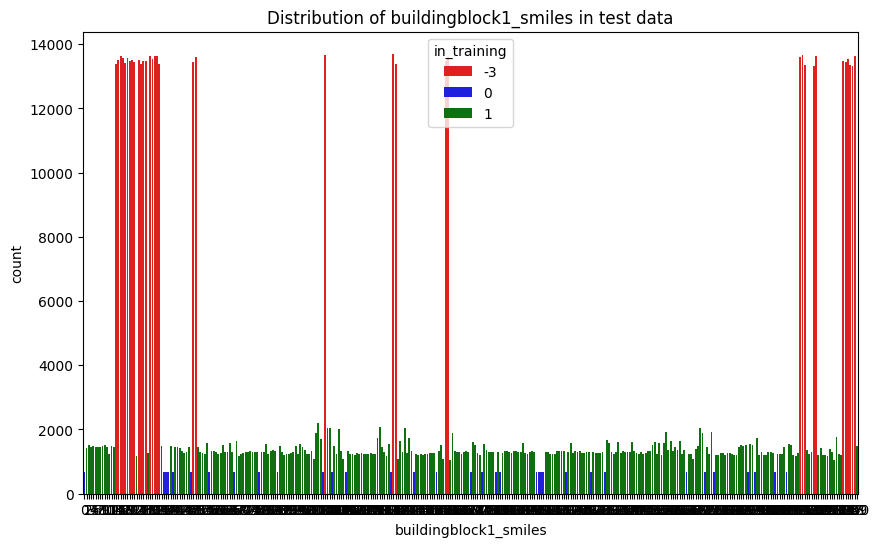

In [124]:
# Create a countplot for each building block in test, colour it by whether the building block is in the training set

plt.figure(figsize=(10, 6))
sns.countplot(x='buildingblock1_smiles', hue='in_training', data=test_data, palette=colors)
plt.title(f'Distribution of buildingblock1_smiles in test data')
plt.show()


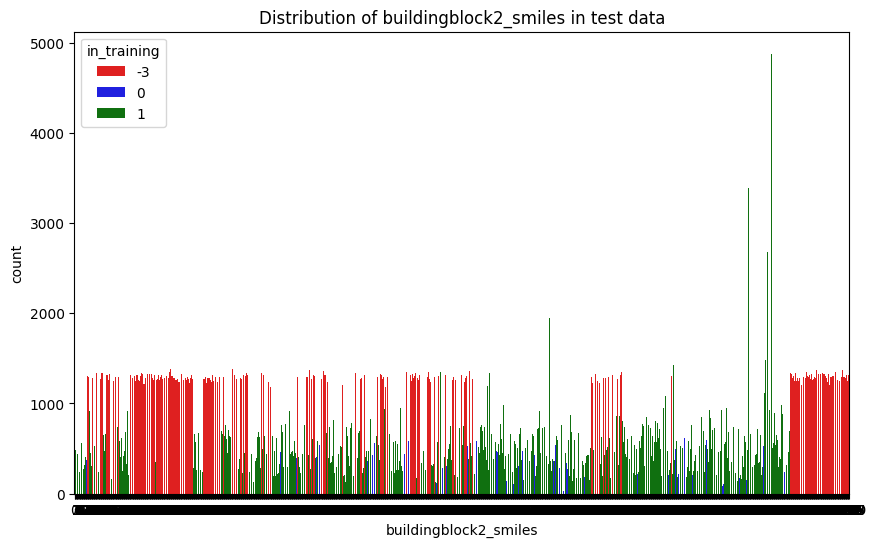

In [125]:
plt.figure(figsize=(10, 6))
# Set colors for hue

sns.countplot(x='buildingblock2_smiles', hue='in_training', data=test_data, palette=colors)
plt.title(f'Distribution of buildingblock2_smiles in test data')
plt.show()

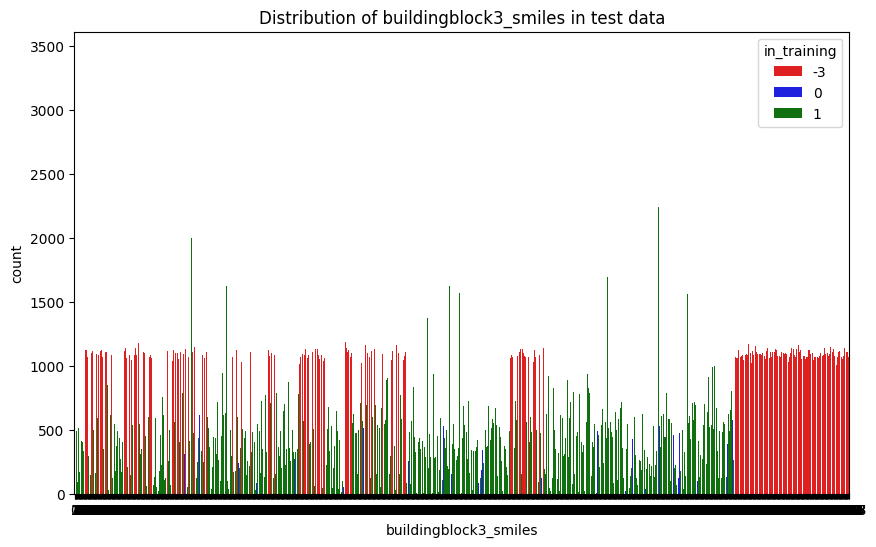

In [126]:
plt.figure(figsize=(10, 6))
sns.countplot(x='buildingblock3_smiles', hue='in_training', data=test_data, palette=colors)
plt.title(f'Distribution of buildingblock3_smiles in test data')
plt.show()

In [127]:
# Load the data
shrunken_test_data = pd.read_parquet("../../data/shrunken/test.parquet")
submission_path = "../../data/submissions/submission_446.csv"
submission = pd.read_csv(submission_path)
raw_data = pd.read_parquet("../../data/raw/test.parquet")

# Merge submission data with raw data on 'id'
raw_data = raw_data.merge(submission[["id", "binds"]], on="id", how="left")

# Create a pivot table to spread the binds values across the protein types
pivot_df = raw_data.pivot_table(index="molecule_smiles", columns="protein_name", values="binds", fill_value=0).reset_index()

# Ensure the pivot table has the necessary columns
pivot_df = pivot_df.rename(
    columns={
        "BRD4": "binds_BRD4",
        "HSA": "binds_HSA",
        "sEH": "binds_sEH",
    },
)

# Initialize columns in shrunken_test_data to ensure they exist before assignment
shrunken_test_data["binds_BRD4"] = 0
shrunken_test_data["binds_HSA"] = 0
shrunken_test_data["binds_sEH"] = 0

# Merge the pivot table with shrunken_test_data on 'molecule_smiles'
shrunken_test_data = shrunken_test_data.merge(pivot_df, on="molecule_smiles", how="left", suffixes=("", "_new"))

# Update the columns with the new values and drop the temporary columns
shrunken_test_data["binds_BRD4"] = shrunken_test_data["binds_BRD4_new"].fillna(0.0)
shrunken_test_data["binds_HSA"] = shrunken_test_data["binds_HSA_new"].fillna(0.0)
shrunken_test_data["binds_sEH"] = shrunken_test_data["binds_sEH_new"].fillna(0.0)

# Drop the temporary columns
shrunken_test_data = shrunken_test_data.drop(columns=["binds_BRD4_new", "binds_HSA_new", "binds_sEH_new"])

In [128]:
# Sum up binds per buildingblock1 smiles to see which is most likely to bind
bb1_binds = shrunken_test_data.groupby("buildingblock1_smiles")["binds_sEH"].sum()
count_bb1 = shrunken_test_data["buildingblock1_smiles"].value_counts()
percentage_bb1 = bb1_binds / count_bb1 * 100

Text(0.5, 1.0, 'Percentage of binds_sEH per buildingblock1_smiles')

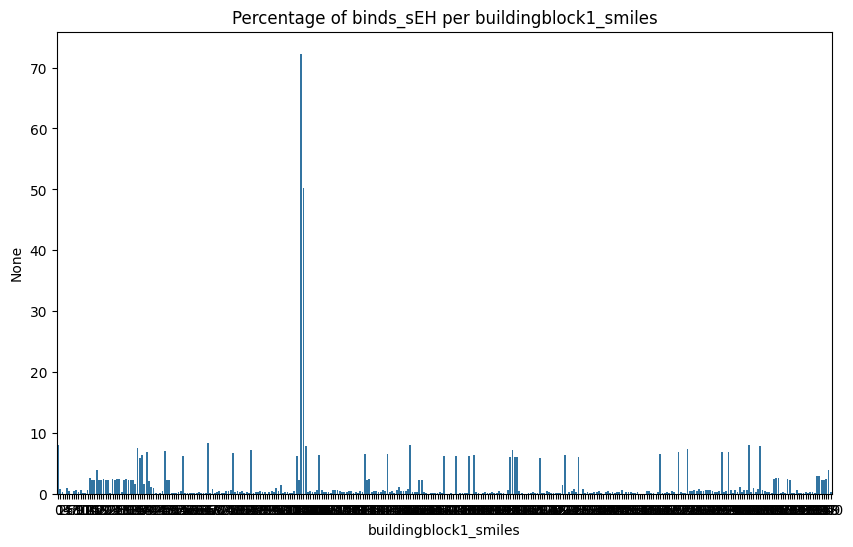

In [129]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_bb1.index, y=percentage_bb1)
plt.title("Percentage of binds_sEH per buildingblock1_smiles")

In [ ]:
# Load in oof predictions
oof_preds = pd.read_csv("../../data/oof_predictions.csv")

In [ ]:
oof_preds

,0,1,2
0,1.341122e-02,0.003186,1.441188e-04
1,1.426117e-03,0.002557,2.250381e-05
2,3.863040e-06,0.000091,1.927085e-06
3,2.367325e-05,0.000055,7.629205e-09
4,2.284040e-07,0.000006,8.698814e-08
...,...,...,...
98415605,4.587648e-10,0.000004,1.731823e-09
98415606,8.786710e-08,0.000220,5.844872e-06
98415607,1.363945e-10,0.001562,6.708935e-08
98415608,2.105909e-04,0.007260,6.717585e-06


In [ ]:
new_data = train_data
new_data['preds_BRD4'] = oof_preds['0']
new_data['preds_HSA'] = oof_preds['1']
new_data['preds_sEH'] = oof_preds['2']

In [ ]:
new_data

,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,binds_BRD4,binds_HSA,binds_sEH,preds_BRD4,preds_HSA,preds_sEH
0,0,0,0,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,0,0,0,1.341122e-02,0.003186,1.441188e-04
1,0,0,1,C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC...,0,0,0,1.426117e-03,0.002557,2.250381e-05
2,0,0,2,C#CCOc1ccc(CNc2nc(NCc3ccc(OCC#C)cc3)nc(N[C@@H]...,0,0,0,3.863040e-06,0.000091,1.927085e-06
3,0,0,6,C#CCOc1ccc(CNc2nc(NCCNC(=O)C(=C)C)nc(N[C@@H](C...,0,0,0,2.367325e-05,0.000055,7.629205e-09
4,0,0,10,C#CCOc1ccc(CNc2nc(NCC(=O)NCC=C)nc(N[C@@H](CC#C...,0,0,0,2.284040e-07,0.000006,8.698814e-08
...,...,...,...,...,...,...,...,...,...,...
98415605,270,692,866,[N-]=[N+]=NCCC[C@H](Nc1nc(Nc2noc3ccc(F)cc23)nc...,0,0,0,4.587648e-10,0.000004,1.731823e-09
98415606,270,692,868,[N-]=[N+]=NCCC[C@H](Nc1nc(Nc2nnc(S)s2)nc(Nc2no...,0,0,0,8.786710e-08,0.000220,5.844872e-06
98415607,270,692,869,[N-]=[N+]=NCCC[C@H](Nc1nc(Nc2nncs2)nc(Nc2noc3c...,0,0,0,1.363945e-10,0.001562,6.708935e-08
98415608,270,692,870,[N-]=[N+]=NCCC[C@H](Nc1nc(Nc2nnn[nH]2)nc(Nc2no...,0,0,0,2.105909e-04,0.007260,6.717585e-06


buildingblock2_smiles
325    30171.522257
493    25540.690981
71     14859.394144
318    13523.272964
26     13477.998227
           ...     
170       63.482957
688       63.363153
4         53.662792
101       42.448693
96        40.001677
Name: preds_sEH, Length: 693, dtype: float64

buildingblock2_smiles
325    29981
493    24264
71     14678
318    13557
26     12705
       ...  
614       63
170       58
4         45
101       42
96        36
Name: binds_sEH, Length: 693, dtype: int64[pyarrow]

buildingblock2_smiles
617    26.106887
296    24.270146
180    21.578687
266    19.657241
4      19.250648
         ...    
259   -13.816702
163   -14.554045
305   -14.868484
152   -15.835441
100   -27.036822
Length: 693, dtype: double[pyarrow]

buildingblock2_smiles
493    127669.09813
576     82900.75214
26     77299.822736
483    33076.936439
123     30955.44245
           ...     
504       24.169977
412       12.262317
428        7.683044
138        4.263054
194        2.709122
Length: 693, dtype: double[pyarrow]

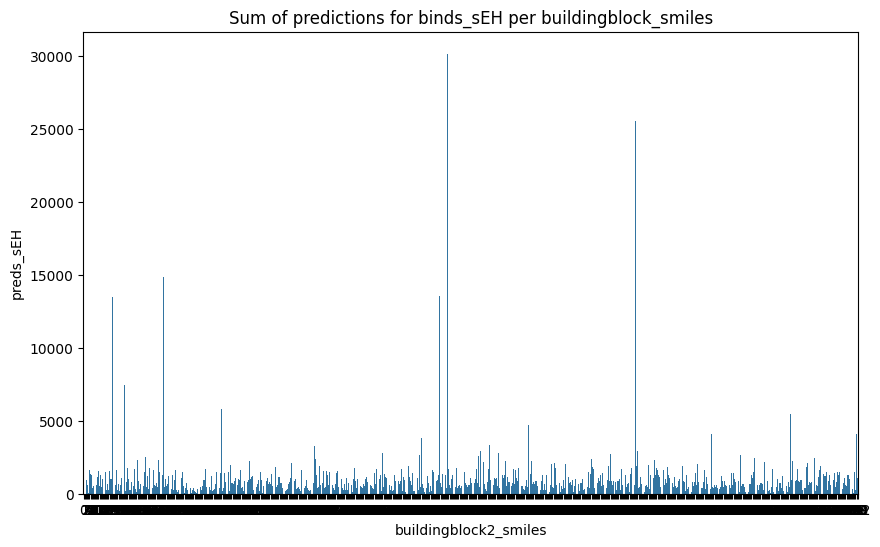

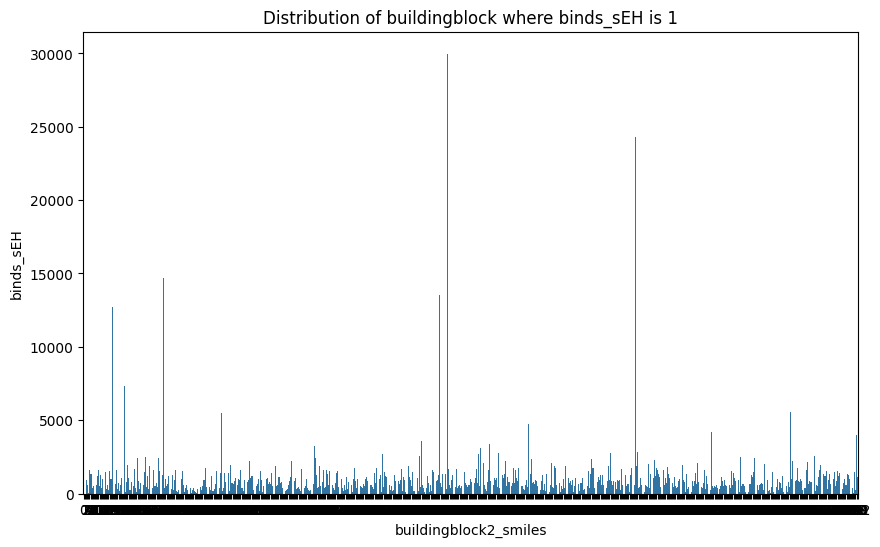

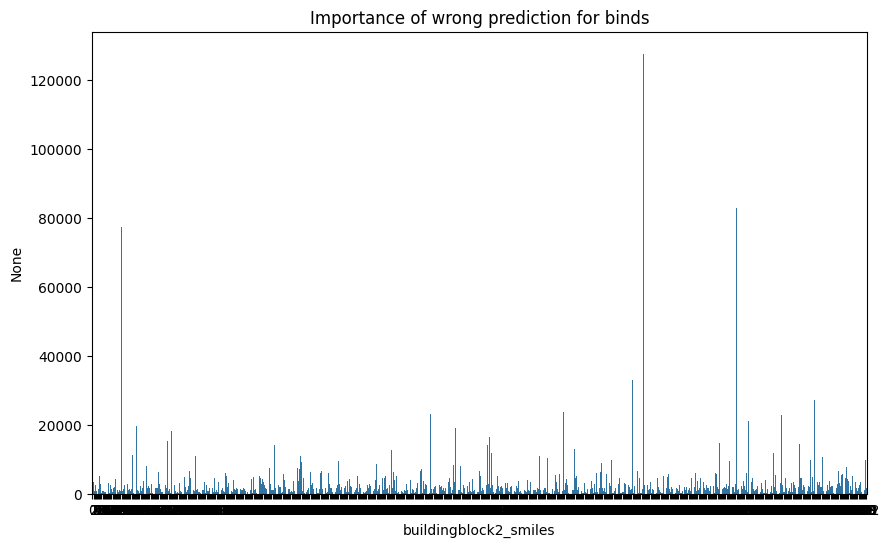

In [ ]:
# Sum up seh predictions per buildingblock 1 smiles and sort by percentage
BUILDINGBLOCK_SEH = 'buildingblock2_smiles'
PROTEIN_PREDS = 'preds_sEH'
PROTEIN_BINDS = 'binds_sEH'
seh_preds = new_data.groupby(BUILDINGBLOCK_SEH)[PROTEIN_PREDS].sum()
seh_labels = new_data.groupby(BUILDINGBLOCK_SEH)[PROTEIN_BINDS].sum()

# Plot sum
plt.figure(figsize=(10, 6))
sns.barplot(x=seh_preds.index, y=seh_preds)
plt.title("Sum of predictions for binds_sEH per buildingblock_smiles")

# Plot original value counts where binds is 1
plt.figure(figsize=(10, 6))
sns.barplot(x=seh_labels.index, y=seh_labels)
plt.title("Distribution of buildingblock where binds_sEH is 1")

# Calculate percentage difference on building block and plot it
seh_diff = seh_preds - seh_labels
seh_diff = seh_diff / seh_labels * 100
seh_importance = seh_diff.abs() * seh_labels
plt.figure(figsize=(10, 6))
sns.barplot(x=seh_importance.index, y=seh_importance)
plt.title("Importance of wrong prediction for binds")

display(seh_preds.sort_values(ascending=False))
display(seh_labels.sort_values(ascending=False))
display(seh_diff.sort_values(ascending=False))
display(seh_importance.sort_values(ascending=False))

In [ ]:
# Calculate the molecules that have the largest percentage error
new_data["error_sEH"] = new_data["preds_sEH"] - new_data["binds_sEH"]
new_data["abs_error_sEH"] = abs(new_data["error_sEH"])

buildingblock1_smiles
21     13797.691832
132    10358.246183
133     6445.314481
157     5546.400911
62      5545.786025
           ...     
176     2599.594724
212     1806.733624
207     1656.753218
76      1142.562836
75       580.147219
Length: 271, dtype: double[pyarrow]

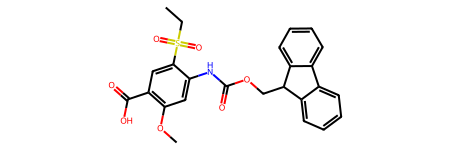

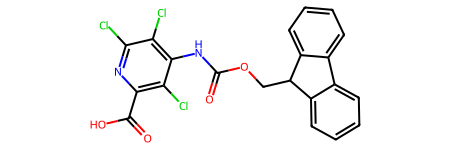

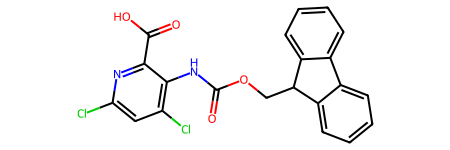

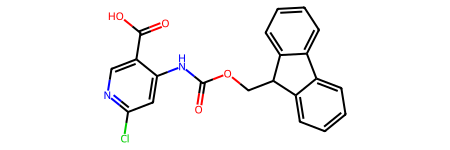

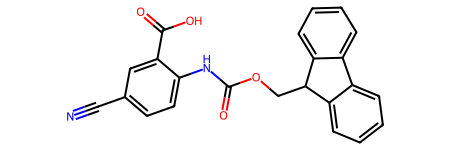

In [ ]:
# Calculate bb1 error per bb1 smiles
bb1_error = new_data.groupby("buildingblock1_smiles")["abs_error_sEH"].sum()
# Balance binds by dividing bb1_error by dividing by the percentage of binds
bb1_error = bb1_error / percentage_seh_bb1
bb1_error = bb1_error.sort_values(ascending=False)
display(bb1_error)

# Display top 5 buildingblock1_smiles with the largest error using mol from smiles in rdkit
for i in range(5):
    display(Chem.MolFromSmiles(train_dicts1[bb1_error.index[i]]))

,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,binds_BRD4,binds_HSA,binds_sEH,preds_BRD4,preds_HSA,preds_sEH,error_sEH,abs_error_sEH
54915433,151,150,574,COc1cc(Br)ccc1Nc1nc(NCC2(O)CCCC2)nc(Nc2cc(C(=O...,0,0,1,1.810551e-05,0.000023,5.619613e-08,-1.0,1.0
95136932,261,673,837,O=C(N[Dy])[C@@H]1Cc2ccc(O)cc2CN1c1nc(Nc2nc3ccc...,0,0,1,6.244078e-05,0.003378,3.012234e-07,-1.0,1.0
66804817,183,662,815,O=C(N[Dy])c1nc(Cl)ccc1Nc1nc(Nc2nc(C3CC3)cs2)nc...,0,0,1,1.542335e-06,0.000744,3.265175e-07,-1.0,1.0
549111,1,354,803,C#CC[C@@H](Nc1nc(NCC2(OCCO)CCS(=O)(=O)C2)nc(Nc...,0,0,1,2.139360e-05,0.001096,3.659285e-07,-1.0,1.0
29230017,80,344,84,CCOC(=O)c1cnc(SC)nc1Nc1nc(NCC(=O)N2CCCO2)nc(N[...,0,0,1,4.038356e-07,0.000071,3.676127e-07,-1.0,1.0
20652787,56,601,571,Cc1ccccc1[C@@H](CC(=O)N[Dy])Nc1nc(NCC2(Cc3cccc...,0,0,1,1.720163e-05,0.000006,4.970446e-07,-1.0,1.0
68788130,189,290,219,COc1cccc(Nc2nc(NCCc3nc(-c4ccccc4)c(C)s3)nc(Nc3...,0,0,1,9.760321e-07,0.000051,5.347922e-07,-0.999999,0.999999
62087475,170,668,719,O=C(N[Dy])c1ccc(Nc2nc(Nc3ccc(F)c(C(F)(F)F)c3)n...,0,0,1,4.678571e-09,0.000152,7.091576e-07,-0.999999,0.999999
97671574,268,660,475,O=C(N[Dy])[C@H]1C[C@H](O)CN1c1nc(NCCS(=O)(=O)C...,0,0,1,8.887272e-07,0.000120,7.551225e-07,-0.999999,0.999999
23129382,63,481,317,Cc1cccc(Nc2nc(NCC34CCCC(CO3)C4)nc(N[C@@H](CC(=...,0,0,1,1.153304e-05,0.000042,7.766232e-07,-0.999999,0.999999


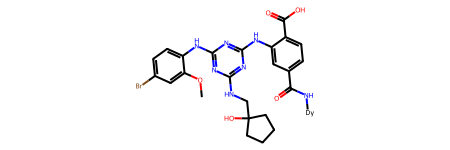

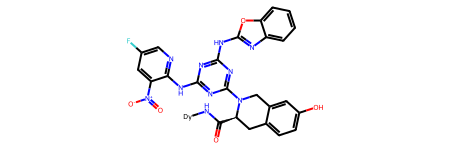

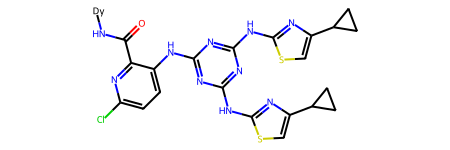

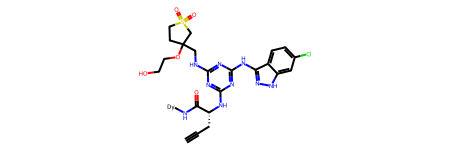

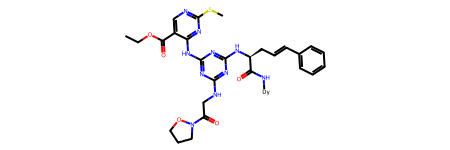

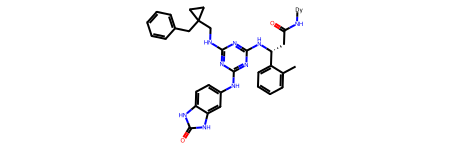

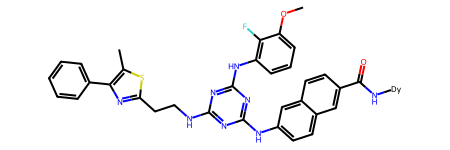

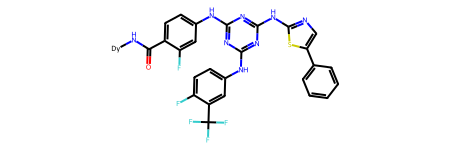

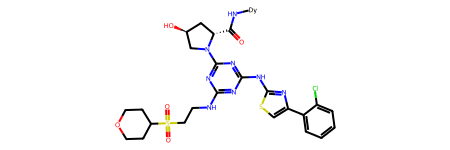

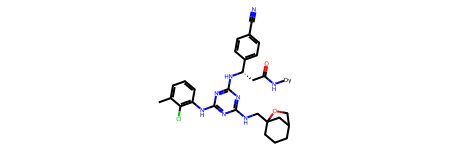

In [ ]:
# Get the molecules with the largest percentage error and draw the molecule smiles using rdkit
largest_error = new_data.nlargest(10, "abs_error_sEH")
display(largest_error)
for smiles in largest_error["molecule_smiles"]:
    display(Chem.MolFromSmiles(smiles))

In [ ]:
# For each row get the percentage of binding for the bb1
percentage_seh_bb1
for error in largest_error["buildingblock1_smiles"]:
    display(percentage_seh_bb1[error])

0.20455640443251427

0.6195503787211555

0.11270322402865804

0.11018676656933502

0.3827166272477719

0.1619656236227413

0.4290379024813657

0.19876063658462056

0.19131406612584886

0.26967171118958555

In [130]:
new_data['seh_bb1_binding_percentage'] = new_data['buildingblock1_smiles'].map(percentage_seh_bb1)
new_data['seh_bb2_binding_percentage'] = new_data['buildingblock2_smiles'].map(percentage_seh_bb2)
new_data['seh_bb3_binding_percentage'] = new_data['buildingblock3_smiles'].map(percentage_seh_bb3)

In [131]:
# HSA
new_data['hsa_bb1_binding_percentage'] = new_data['buildingblock1_smiles'].map(percentage_hsa_bb1)
new_data['hsa_bb2_binding_percentage'] = new_data['buildingblock2_smiles'].map(percentage_hsa_bb2)
new_data['hsa_bb3_binding_percentage'] = new_data['buildingblock3_smiles'].map(percentage_hsa_bb3)

# BRD4
new_data['brd4_bb1_binding_percentage'] = new_data['buildingblock1_smiles'].map(percentage_brd4_bb1)
new_data['brd4_bb2_binding_percentage'] = new_data['buildingblock2_smiles'].map(percentage_brd4_bb2)
new_data['brd4_bb3_binding_percentage'] = new_data['buildingblock3_smiles'].map(percentage_brd4_bb3)

In [132]:
# Calculate binding chance of seh depending on percentage_seh_bb1 * percentage_seh_bb2 * percentage_seh_bb3 for each row and add it
new_data['seh_chance'] = new_data['seh_bb1_binding_percentage'] * new_data['seh_bb2_binding_percentage'] * new_data['seh_bb3_binding_percentage']
new_data['seh_chance'] = new_data['seh_chance'].fillna(1e-9) / 100

# HSA
new_data['hsa_chance'] = new_data['hsa_bb1_binding_percentage'] * new_data['hsa_bb2_binding_percentage'] * new_data['hsa_bb3_binding_percentage']
new_data['hsa_chance'] = new_data['hsa_chance'].fillna(1e-9) / 100

# BRD4
new_data['brd4_chance'] = new_data['brd4_bb1_binding_percentage'] * new_data['brd4_bb2_binding_percentage'] * new_data['brd4_bb3_binding_percentage']
new_data['brd4_chance'] = new_data['brd4_chance'].fillna(1e-9) / 100

In [ ]:
labels = new_data[['binds_BRD4', 'binds_HSA', 'binds_sEH']].to_numpy(dtype=np.int16)
chances = new_data[['brd4_chance', 'hsa_chance', 'seh_chance']].to_numpy()

In [ ]:
# Calculate micro mean average precision
display(average_precision_score(labels.flatten(), chances.flatten(), average='micro'))

0.4599348341781134

In [ ]:
# Instead of multiplying, get the max of seh_bb1_binding_percentage, seh_bb2_binding_percentage, seh_bb3_binding_percentage
new_data['seh_chance_max'] = new_data[['seh_bb1_binding_percentage', 'seh_bb2_binding_percentage', 'seh_bb3_binding_percentage']].max(axis=1)
new_data['seh_chance_max'] = new_data['seh_chance_max'] / 100

# HSA
new_data['hsa_chance_max'] = new_data[['hsa_bb1_binding_percentage', 'hsa_bb2_binding_percentage', 'hsa_bb3_binding_percentage']].max(axis=1)
new_data['hsa_chance_max'] = new_data['hsa_chance_max'] / 100

# BRD4
new_data['brd4_chance_max'] = new_data[['brd4_bb1_binding_percentage', 'brd4_bb2_binding_percentage', 'brd4_bb3_binding_percentage']].max(axis=1)
new_data['brd4_chance_max'] = new_data['brd4_chance_max'] / 100

In [ ]:
# Calculate micro mean average precision
maxes = new_data[['brd4_chance_max', 'hsa_chance_max', 'seh_chance_max']].to_numpy()

display(average_precision_score(labels.flatten(), maxes.flatten(), average='micro'))

0.33126323603797253

In [ ]:
# Mean average precision for predictions
preds = new_data[['preds_BRD4', 'preds_HSA', 'preds_sEH']].to_numpy()
display(average_precision_score(labels.flatten(), preds.flatten(), average='micro'))

0.7251758046195889

In [133]:
new_data

,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,binds_BRD4,binds_HSA,binds_sEH,preds_BRD4,preds_HSA,preds_sEH,...,brd4_bb2_binding_percentage,brd4_bb3_binding_percentage,seh_chance,hsa_chance,brd4_chance,seh_chance_max,hsa_chance_max,brd4_chance_max,seh_new,processed_seh
0,0,0,0,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,0,0,0,1.341122e-02,0.003186,1.441188e-04,...,0.081279,1.376972,0.001679,0.000680,2.018862e-04,0.008847,0.008858,0.013770,1.441188e-04,1.441188e-04
1,0,0,1,C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC...,0,0,0,1.426117e-03,0.002557,2.250381e-05,...,0.081279,1.687946,0.001794,0.000418,2.474800e-04,0.009453,0.005454,0.016879,2.250381e-05,2.250381e-05
2,0,0,2,C#CCOc1ccc(CNc2nc(NCc3ccc(OCC#C)cc3)nc(N[C@@H]...,0,0,0,3.863040e-06,0.000091,1.927085e-06,...,0.081279,0.000951,0.001309,0.000014,1.393635e-07,0.007629,0.003324,0.001804,1.927085e-06,1.927085e-06
3,0,0,6,C#CCOc1ccc(CNc2nc(NCCNC(=O)C(=C)C)nc(N[C@@H](C...,0,0,0,2.367325e-05,0.000055,7.629205e-09,...,0.081279,0.103017,0.000472,0.000015,1.510392e-05,0.007629,0.003324,0.001804,7.629205e-09,7.629205e-09
4,0,0,10,C#CCOc1ccc(CNc2nc(NCC(=O)NCC=C)nc(N[C@@H](CC#C...,0,0,0,2.284040e-07,0.000006,8.698814e-08,...,0.081279,0.188814,0.000676,0.000086,2.768316e-05,0.007629,0.003324,0.001888,8.698814e-08,8.698814e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98415605,270,692,866,[N-]=[N+]=NCCC[C@H](Nc1nc(Nc2noc3ccc(F)cc23)nc...,0,0,0,4.587648e-10,0.000004,1.731823e-09,...,0.046239,0.030276,0.000308,0.000032,4.168513e-06,0.006387,0.002416,0.002978,1.731823e-09,1.731823e-09
98415606,270,692,868,[N-]=[N+]=NCCC[C@H](Nc1nc(Nc2nnc(S)s2)nc(Nc2no...,0,0,0,8.786710e-08,0.000220,5.844872e-06,...,0.046239,0.200496,0.000483,0.000125,2.760531e-05,0.006387,0.003031,0.002978,5.844872e-06,5.844872e-06
98415607,270,692,869,[N-]=[N+]=NCCC[C@H](Nc1nc(Nc2nncs2)nc(Nc2noc3c...,0,0,0,1.363945e-10,0.001562,6.708935e-08,...,0.046239,0.068859,0.001351,0.000772,9.480887e-06,0.012189,0.018736,0.002978,6.708935e-08,6.708935e-08
98415608,270,692,870,[N-]=[N+]=NCCC[C@H](Nc1nc(Nc2nnn[nH]2)nc(Nc2no...,0,0,0,2.105909e-04,0.007260,6.717585e-06,...,0.046239,0.777396,0.001422,0.000974,1.070358e-04,0.012830,0.023642,0.007774,6.717585e-06,6.717585e-06


In [134]:
# For binds_sEH take the seh_bb1_binding_percentage, seh_bb2_binding_percentage, seh_bb3_binding_percentage and feed them into a decision tree to predict the binds_sEH
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = new_data[['seh_bb1_binding_percentage', 'seh_bb2_binding_percentage', 'seh_bb3_binding_percentage']]
y = new_data['binds_sEH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print progress
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Use mean average precision to evaluate the model
preds = clf.predict(X_test)
display(average_precision_score(y_test, preds))

0.45567321832328994